In [4]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_0 = pd.read_csv('data/prices_round_3_day_0.csv', sep =";")
data_1 = pd.read_csv('data/prices_round_3_day_1.csv', sep =";")
data_2 = pd.read_csv('data/prices_round_3_day_2.csv', sep =";")

data=[data_0, data_1, data_2]
data= pd.concat(data)
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [30]:
#create 4 different dataframes from data for each product CHOCOLATE, STRAWBERRY, ROSES, GIFT_BASKET
data_chocolate = data[data['product'] == 'CHOCOLATE'].reset_index(drop=True)
data_strawberry = data[data['product'] == 'STRAWBERRIES'].reset_index(drop=True)
data_roses = data[data['product'] == 'ROSES'].reset_index(drop=True)
data_gift_basket = data[data['product'] == 'GIFT_BASKET'].reset_index(drop=True)


In [31]:
spread = data_gift_basket['mid_price'] - (4 * data_chocolate['mid_price'] + 6 * data_strawberry['mid_price'] + 1 * data_roses['mid_price'])

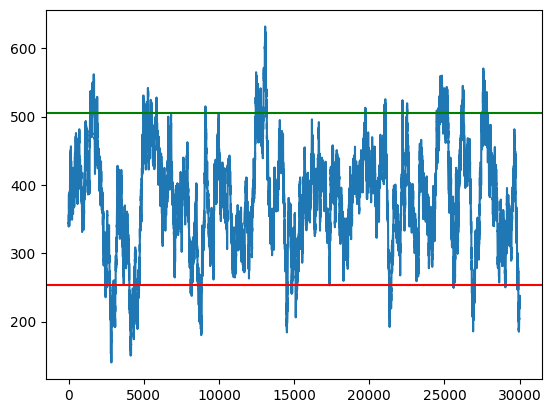

In [41]:
spread.plot()
#plot horizontal line at spread_upper_bound and spread_lower_bound
plt.axhline(y=spread_lower_bound, color='r', linestyle='-')
plt.axhline(y=spread_upper_bound, color='g', linestyle='-')

In [36]:
#find the two boubderies for the 95% confidence interval for the spread
spread_mean = spread.mean()
spread_std = spread.std()
spread_upper_bound = spread_mean + 1.96 * spread_std
spread_lower_bound = spread_mean - 1.96 * spread_std

In [40]:
#find the two boubderies for the 90% confidence interval for the spread
spread_mean = spread.mean()
spread_std = spread.std()
spread_upper_bound = spread_mean + 1.645 * spread_std
spread_lower_bound = spread_mean - 1.645 * spread_std


In [42]:
spread_upper_bound

505.2085920091522

In [43]:
spread_lower_bound

253.77237465751443